In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df=pd.read_csv("Bengaluru_House_Data.csv")

In [5]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [16]:
df.rename(columns={'area_type':'Area_type'},inplace=True)
df.columns=(df.columns.str.strip())


In [18]:
df.drop(columns=['society','availability'],inplace=True)

In [20]:
df.head()

,Area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [22]:
df.isnull().sum()

Area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [24]:
df.dropna(inplace=True)

In [26]:
df.isnull().sum()

Area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [28]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [30]:
df.drop(columns=['size'],inplace=True)

In [32]:
df.head()

,Area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2


## Filter and subset the data based on specific criteria

In [35]:
df_f=df[(df['location']=='Uttarahalli')]

In [37]:
df_f

,Area_type,location,total_sqft,bath,balcony,price,bhk
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3
39,Built-up Area,Uttarahalli,1143,2.0,2.0,45.00,2
336,Built-up Area,Uttarahalli,1020,2.0,2.0,45.00,2
546,Super built-up Area,Uttarahalli,1286,2.0,2.0,63.00,2
761,Super built-up Area,Uttarahalli,1101,2.0,0.0,45.00,2
...,...,...,...,...,...,...,...
13037,Built-up Area,Uttarahalli,1650,2.0,1.0,130.00,3
13088,Super built-up Area,Uttarahalli,1290,2.0,2.0,56.12,3
13230,Super built-up Area,Uttarahalli,1590,3.0,2.0,57.00,3
13271,Super built-up Area,Uttarahalli,1075,2.0,1.0,46.76,2


In [39]:
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')

In [41]:
df.dropna(inplace=True)

## Feature engineering 

In [174]:
df['price_per_sqft']= df['price']*100000/df['total_sqft']

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12524 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        12524 non-null  object 
 1   total_sqft      12524 non-null  float64
 2   bath            12524 non-null  float64
 3   balcony         12524 non-null  float64
 4   price           12524 non-null  float64
 5   bhk             12524 non-null  int64  
 6   price_per_sqft  12524 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 782.8+ KB


In [178]:
df['location'].value_counts()

location
Whitefield           498
Sarjapur  Road       366
Electronic City      300
Kanakpura Road       255
Thanisandra          220
                    ... 
S R Layout             1
Meenakshi Layout       1
Vidyapeeta             1
Maruthi Extension      1
Abshot Layout          1
Name: count, Length: 1259, dtype: int64

In [180]:
location_counts=df['location'].value_counts()

In [182]:
locations_to_replace = location_counts[location_counts < 10].index
locations_to_replace

Index(['5th Block Hbr Layout', 'Gollahalli', '2nd Phase JP Nagar', 'Peenya',
       'Chandra Layout', 'Chennammana Kere', 'Ejipura', 'Nehru Nagar',
       'B Narayanapura', 'Banagiri Nagar',
       ...
       'Subbannaiah Palya', 'whitefiled', 'Medi Agrahara', 'Sadduguntepalya',
       'Shirdi Sai Nagar', 'S R Layout', 'Meenakshi Layout', 'Vidyapeeta',
       'Maruthi Extension', 'Abshot Layout'],
      dtype='object', name='location', length=1012)

In [184]:

df['location'] = df['location'].replace(locations_to_replace, 'Other')

In [185]:
df['location'].value_counts()

location
Other                    2630
Whitefield                498
Sarjapur  Road            366
Electronic City           300
Kanakpura Road            255
                         ... 
Kalkere                    10
Doddaballapur              10
Nagappa Reddy Layout       10
1st Block Koramangala      10
Basapura                   10
Name: count, Length: 248, dtype: int64

In [188]:
df.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [190]:
df = pd.get_dummies(df, columns=['location'], drop_first=True)

In [192]:
df.head()

,total_sqft,bath,balcony,price,bhk,price_per_sqft,location_1st Block Jayanagar,location_1st Block Koramangala,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,1056.0,2.0,1.0,39.07,2,3699.810606,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2600.0,5.0,3.0,120.00,4,4615.384615,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1440.0,2.0,3.0,62.00,3,4305.555556,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1521.0,3.0,1.0,95.00,3,6245.890861,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1200.0,2.0,1.0,51.00,2,4250.000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [194]:
df["bath"].info()

<class 'pandas.core.series.Series'>
Index: 12524 entries, 0 to 13319
Series name: bath
Non-Null Count  Dtype  
--------------  -----  
12524 non-null  float64
dtypes: float64(1)
memory usage: 195.7 KB


In [68]:
df.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,12524.000000,12524.000000,12524.000000,12524.000000,12524.000000,1.252400e+04
mean,1510.454911,2.616257,1.603881,106.121675,2.740339,6.897454e+03
std,1162.445581,1.219231,0.803443,132.213979,1.202674,2.276190e+04
min,5.000000,1.000000,0.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,1.000000,49.500000,2.000000,4.240120e+03
50%,1260.000000,2.000000,2.000000,70.000000,3.000000,5.392157e+03
75%,1640.000000,3.000000,2.000000,115.000000,3.000000,7.171315e+03
max,52272.000000,40.000000,3.000000,2912.000000,43.000000,2.300000e+06


In [60]:

average_sale_price = df['price_per_sqft'].mean()

In [62]:
average_sale_price

6897.453991400879

<Axes: xlabel='bath'>

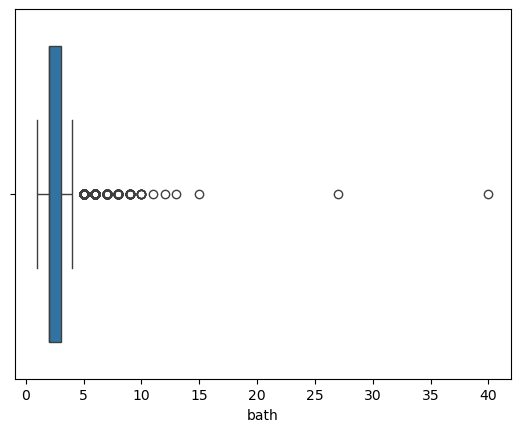

In [64]:
sns.boxplot(x='bath',data=df)

In [82]:
Q1 = df['bath'].quantile(0.25)
Q3 = df['bath'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

df1_filtered = df[(df['bath'] <= upper_bound) & (df['bath'] >= lower_bound)]

df1 = df1_filtered

<Axes: xlabel='bath'>

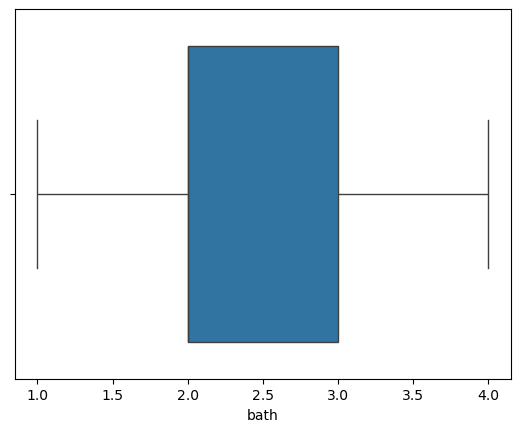

In [88]:
sns.boxplot(x='bath',data=df1)

In [196]:
df.to_csv("rj.csv",index=False)